# Here we use RACs to vectorize the free ligands, then cluster them using this vector to eliminate duplicates.

In [4]:
# imports...

import pickle
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from collections import defaultdict, Counter
from scipy.sparse.csgraph import connected_components
from ase import io, neighborlist

# need molsimplify for RAC functions to represent ligands
from molSimplify.Informatics.autocorrelation import *
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
def get_ligand_rac(mol_obj, ligand_connections):
    """
    Function takes in ligands and returns the graph-based vector representation of ligands.
    
    Args:
    mol_obj: Ase Atoms object for the ligand.
    ligand_connections: The indices of the atoms which connect to the metal, this is 
    required for the RAC.
    
    Returns:
    numpy array of the rac
    """
    # two properties.
    properties = ["electronegativity", "nuclear_charge"]
    # bond-wise distance to travel from the coordinating atoms.
    l_depth = 5
    nn = pickle.load(open(ligand_connections, "rb"))
    rest_of_autoz = np.zeros(shape=(len(properties), l_depth+1))
    rest_of_deltas = np.zeros(shape=(len(properties), l_depth))
    for idx, p in enumerate(properties):
        rest_of_autoz[idx] = atom_only_autocorrelation(mol_obj, p, l_depth, nn, oct=False)
        rest_of_deltas[idx] = atom_only_deltametric(mol_obj, p, l_depth, nn)[1:]
        name_of_idx = ["LC-mult-{}-{}".format(p, x) for x in range(0, l_depth+1)]
        name_of_idx_diff = ["LC-diff-{}-{}".format(p, x) for x in range(1, l_depth+1)]
    rac_res = np.concatenate((rest_of_autoz, rest_of_deltas), axis=None)
    return rac_res

In [3]:
def get_racs_from_directory(directory):
    """
    Returns the racs given a path to the directory containing the xyz.
    """
    cwd = os.getcwd()
    files = os.listdir(directory)
    xyz_files = [x for x in tri_files if "xyz" in x]
    xyz2connection = {}
    for x in xyz_files:
        xyz2connection[x] = x.replace("ligand.xyz", "connections.p")
        
    ligand_racs = []
    for xyz in xyz_files:
        connection = xyz2connection[xyz]
        xyz = cwd + xyz
        ligand_racs.append(get_ligand_rac(xyz, cwd + connection))
    return ligand_racs

In [35]:
ligand_racs = []
for xyz in tri_files:
    connection = xyz2connection[xyz]
    xyz = "tetra_ligands/" + xyz
    ligand_racs.append(get_ligand_rac(xyz, "tetra_ligands/"+connection))

We perform K means clustering on the dataset to find the number of clusters which will divide the dataset, going in increments of 25 in cluster number from 10 to 335.

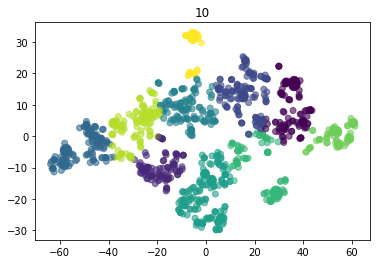

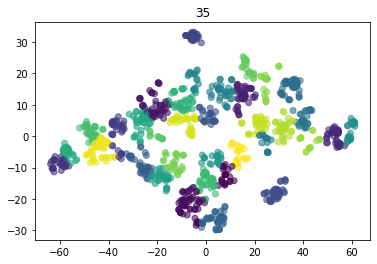

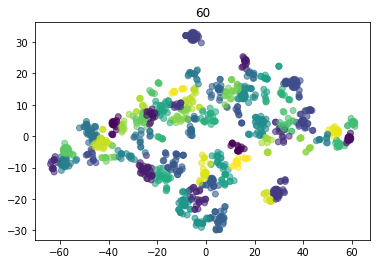

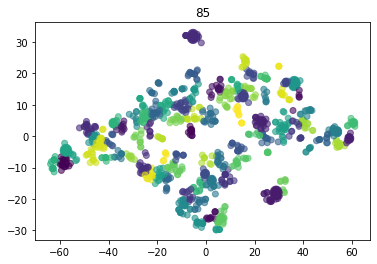

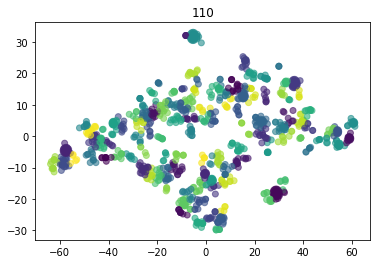

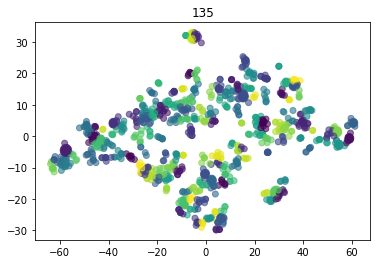

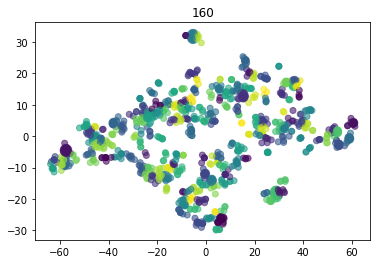

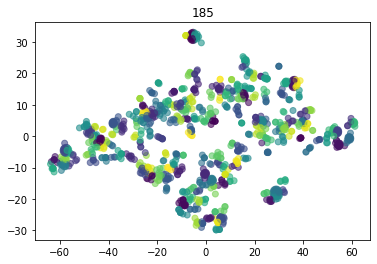

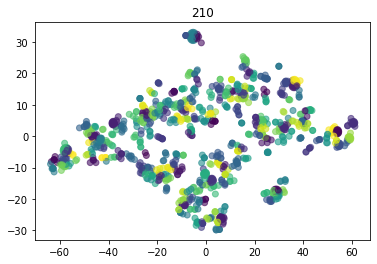

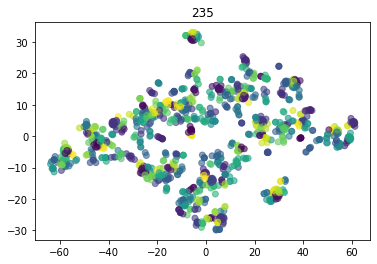

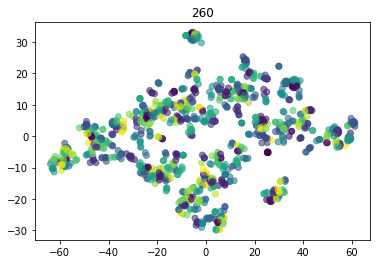

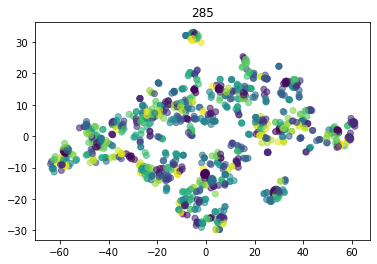

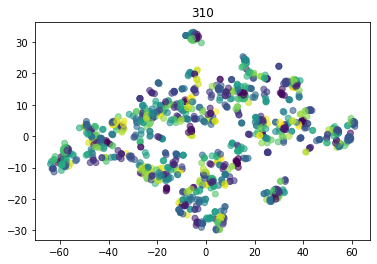

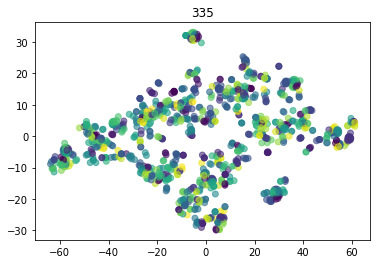

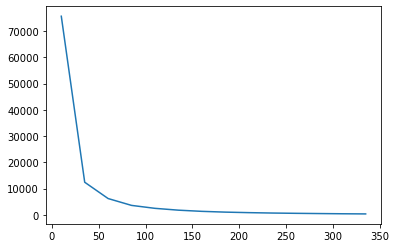

In [29]:
clusters = np.arange(10, 350, 25)

inertias = []
for n_clus in clusters:
    kmc = KMeans(n_clusters=n_clus)
    kmc.fit(X_embedded)
    inertias.append(kmc.inertia_)
    plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.6, c=kmc.labels_)
    plt.title(n_clus)
    plt.show()
plt.plot(clusters, inertias)

In [37]:
def find_distinct_from_tsne(lig_racs, n_clusters=100, n_comps=2, verbose=False):
    """
    Args: 
    ligand_racs: revised autocorrelation function for ligands
    Function performs tsne on the racs, then does kmeans to sort the 
    distinct ligands.
    
    Returns xyz files only for distinct ligands. 
    """
        
    X_embedded = TSNE(n_components=n_comps).fit_transform(lig_racs)

    kmc = KMeans(n_clusters=n_clusters, random_state=42)
    kmc.fit(X_embedded,)
    if verbose:
        plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.6, c=kmc.labels_)
        plt.show()

        
    # make a dictionary mapping cluster number to indices which are within
    # that cluster
    clus2indices = defaultdict(list)
    for idx, clus in enumerate(kmc.labels_):
        clus2indices[clus].append(idx)
    
    distinct_ligands = []
    print(clus2indices)
    for clus in range(len(clus2indices)):
        num_in_clus = len(clus2indices[clus])
        # check set of atomic numbers in the cluster, if they 
        # are the exact same and the vector representation groups
        # them together, we consdier them duplicates.
        atomic_nums_in_clus = set()
        for idx in range(num_in_clus):
            ref_mol = io.read("{}/{}".format(ligand_dir, xyz_files[clus2indices[clus][idx]]))
            if tuple(sorted(ref_mol.numbers)) in atomic_nums_in_clus:
                if verbose:
                    print(xyz_files[clus2indices[clus][idx]])
                    print(clus)
                continue
            else:
                atomic_nums_in_clus.add(tuple(sorted(ref_mol.numbers)))
                distinct_ligands.append(xyz_files[clus2indices[clus][idx]])

    return distinct_ligands

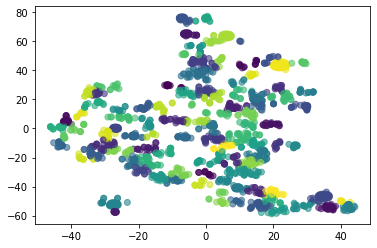

CAWTEB_tetra_ligand.xyz
0
NALROH_tetra_ligand.xyz
0
BADZOV_tetra_ligand.xyz
0
BIYFAQ_tetra_ligand.xyz
0
RICSIF_tetra_ligand.xyz
0
COKXAB_tetra_ligand.xyz
0
RICSOL_tetra_ligand.xyz
0
RICSUR_tetra_ligand.xyz
0
NALQEW_tetra_ligand.xyz
0
MAMVAX_tetra_ligand.xyz
1
YIWTAC_tetra_ligand.xyz
2
YIWSUV_tetra_ligand.xyz
2
NAWFUP_tetra_ligand.xyz
2
VIKXOC_tetra_ligand.xyz
2
SIQHAE_tetra_ligand.xyz
2
DIDKIK_tetra_ligand.xyz
3
MIGDAI_tetra_ligand.xyz
3
DIDKOQ_tetra_ligand.xyz
3
FOWKAE_tetra_ligand.xyz
3
NIKSAD_tetra_ligand.xyz
3
SAPHEZ_tetra_ligand.xyz
3
BANFOM_tetra_ligand.xyz
3
BOVGID_tetra_ligand.xyz
3
OCAROZ_tetra_ligand.xyz
3
VIKJEE_tetra_ligand.xyz
3
XEZQOI_tetra_ligand.xyz
3
KAKZOM_tetra_ligand.xyz
3
ZUJRAZ_tetra_ligand.xyz
3
NANNEV_tetra_ligand.xyz
3
KAKZUS_tetra_ligand.xyz
3
CORHUM_tetra_ligand.xyz
3
RIVCIJ_tetra_ligand.xyz
3
YEVPOH_tetra_ligand.xyz
3
SOKQUE_tetra_ligand.xyz
3
NOZMOE_tetra_ligand.xyz
3
BILQAP_tetra_ligand.xyz
3
ERATOG_tetra_ligand.xyz
4
JIXCEZ_tetra_ligand.xyz
4
XUCJAI_tetra

HAGXUI_tetra_ligand.xyz
28
QEDCIO_tetra_ligand.xyz
28
XIHLUY_tetra_ligand.xyz
28
HAGKAD_tetra_ligand.xyz
29
SAFDUA_tetra_ligand.xyz
29
HEHRUH_tetra_ligand.xyz
29
IQEFIU_tetra_ligand.xyz
29
MIGTEE_tetra_ligand.xyz
29
BOVNUW_tetra_ligand.xyz
29
ESUMIP_tetra_ligand.xyz
29
TOMYOM_tetra_ligand.xyz
29
XELKUV_tetra_ligand.xyz
29
ICUXUB_tetra_ligand.xyz
29
ICUXOV_tetra_ligand.xyz
29
HABXUF_tetra_ligand.xyz
29
SIFVOT_tetra_ligand.xyz
29
ICUYIQ_tetra_ligand.xyz
29
IKEXEC_tetra_ligand.xyz
29
AVAPIY_tetra_ligand.xyz
29
OVONUJ_tetra_ligand.xyz
29
AWOZES_tetra_ligand.xyz
29
QACSES_tetra_ligand.xyz
30
BOJNET_tetra_ligand.xyz
30
QACSAO_tetra_ligand.xyz
30
AGUJUH_tetra_ligand.xyz
30
WOJVEX_tetra_ligand.xyz
32
SIZVAZ_tetra_ligand.xyz
32
FURTUI_tetra_ligand.xyz
32
TEBRUP_tetra_ligand.xyz
32
SIZVED_tetra_ligand.xyz
32
VEDGET_tetra_ligand.xyz
32
SIZVIH_tetra_ligand.xyz
32
WOJVIB_tetra_ligand.xyz
32
WIXCOW_tetra_ligand.xyz
32
BUKVEJ_tetra_ligand.xyz
32
TEBKIW_tetra_ligand.xyz
32
SIZVON_tetra_ligand.xyz
32
Q

ROMSUI_tetra_ligand.xyz
60
QETJUU_tetra_ligand.xyz
60
UKOWAT_tetra_ligand.xyz
60
TAKYEJ_tetra_ligand.xyz
60
POLDOJ_tetra_ligand.xyz
60
DEPKUE_tetra_ligand.xyz
60
UBEKEU_tetra_ligand.xyz
60
JIYSOZ_tetra_ligand.xyz
60
NUKZUO_tetra_ligand.xyz
60
XUSBUJ_tetra_ligand.xyz
60
RISXUO_tetra_ligand.xyz
61
XISBEH_tetra_ligand.xyz
61
GOWSUI_tetra_ligand.xyz
61
LUWKOF_tetra_ligand.xyz
61
YOWGUM_tetra_ligand.xyz
61
GIBDOM_tetra_ligand.xyz
61
VENQOX_tetra_ligand.xyz
61
XEGZEO_tetra_ligand.xyz
61
TANYOW_tetra_ligand.xyz
61
GIBDUS_tetra_ligand.xyz
61
FUHKUQ_tetra_ligand.xyz
61
QIBDUD_tetra_ligand.xyz
61
XELMOR_tetra_ligand.xyz
61
SORHEN_tetra_ligand.xyz
62
MAYBOG_tetra_ligand.xyz
62
KAPJAP_tetra_ligand.xyz
62
BAFKOL_tetra_ligand.xyz
62
XITQOG_tetra_ligand.xyz
62
WUTYIU_tetra_ligand.xyz
62
UKEQIK_tetra_ligand.xyz
62
QEFWUT_tetra_ligand.xyz
62
NURQEX_tetra_ligand.xyz
62
UXEWIF_tetra_ligand.xyz
62
GISXEO_tetra_ligand.xyz
62
GISXOY_tetra_ligand.xyz
62
GISXAK_tetra_ligand.xyz
62
AXUZAV_tetra_ligand.xyz
62
G

ETAPIZ_tetra_ligand.xyz
99
MATGAS_tetra_ligand.xyz
99
SELSOR_tetra_ligand.xyz
99
956
2170


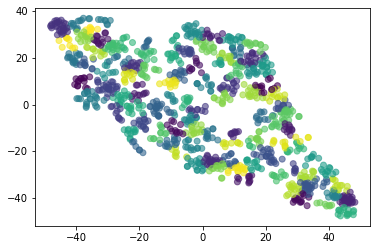

CEKWIA_tetra_ligand.xyz
0
VOKZUS_tetra_ligand.xyz
8
TAQVEN_tetra_ligand.xyz
9
QITMUD_tetra_ligand.xyz
9
FILGUC_tetra_ligand.xyz
14
CMTRCO_tetra_ligand.xyz
14
AEMANI_tetra_ligand.xyz
14
NIZNAL_tetra_ligand.xyz
14
RUMHIQ_tetra_ligand.xyz
14
DOYMIN_tetra_ligand.xyz
14
DAPXAW_tetra_ligand.xyz
14
QOQYOK_tetra_ligand.xyz
14
XIJQUC_tetra_ligand.xyz
20
BOZZUL_tetra_ligand.xyz
39
JEKYAZ_tetra_ligand.xyz
39
MEZFEC_tetra_ligand.xyz
39
NOZLOD_tetra_ligand.xyz
42
ECOSAL_tetra_ligand.xyz
48
BOVFUO_tetra_ligand.xyz
84
19
1214


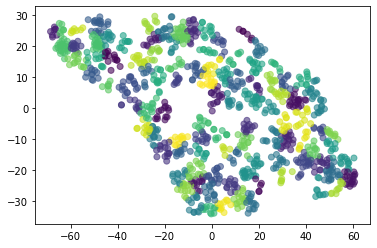

SOKPUE_tetra_ligand.xyz
25
YELPUB_tetra_ligand.xyz
81
2
1195


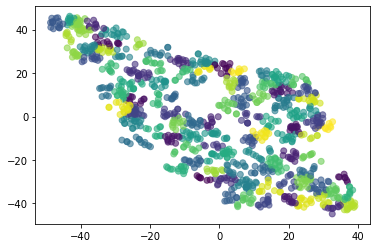

QIXJEN_tetra_ligand.xyz
23
FUGCUG_tetra_ligand.xyz
23
BEQSIZ_tetra_ligand.xyz
41
MEBYIE_tetra_ligand.xyz
47
4
1193


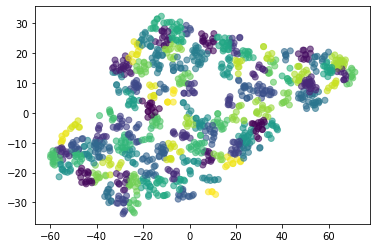

QAPDOB_tetra_ligand.xyz
6
YEVNUL_tetra_ligand.xyz
42
2
1189


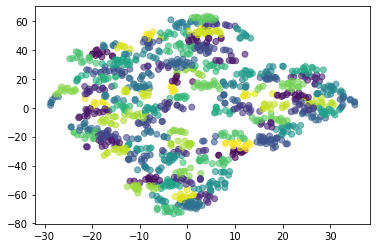

NASPUU_tetra_ligand.xyz
95
1
1187


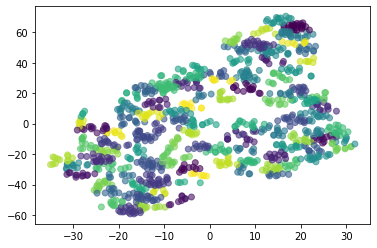

FAJDOJ_tetra_ligand.xyz
25
CULZUE_tetra_ligand.xyz
61
2
1186


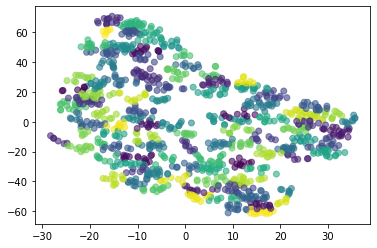

0
1184


In [79]:
ligand_dir_name = "tetra_ligands/"
all_files = os.listdir(ligand_dir_name)
xyz_files = [x for x in all_files if "xyz" in x]
xyz2connection = {}
for x in xyz_files:
    # file handling
    xyz2connection[x] = x.replace("ligand.xyz", "connections.p")

ligname2rac = defaultdict()
for xyz in xyz_files:
    connection = xyz2connection[xyz]
    this_mol = mol3D()
    this_mol.readfromxyz(ligand_dir_name + xyz)
    # this gets the number of atoms
    num_atoms = int(this_mol.coords().split(" ")[0])
    
    # dont want unrealistic, small ligands 
    if num_atoms<10:
        continue

    ligname2rac[xyz] = get_ligand_rac(this_mol, ligand_dir_name+connection)

difference_in_len = 1000
n_clus = 100
while difference_in_len!=0:
    ligand_racs = []
    for xyz in xyz_files:
        try:
            ligand_racs.append(ligname2rac[xyz])
        except KeyError:
            # will get key errors whenever a small ligand comes up, because
            # we didnt calculate racs for it.
            pass
    
    orig_len = len(ligand_racs)
    xyz_files = find_distinct_from_tsne(ligand_racs, ligand_dir_name, n_clusters=n_clus, verbose=True)
    difference_in_len = orig_len - len(xyz_files)
#     if n_clus>20:
#         n_clus -= 10
#     else:
#         n_clus -= 2
    print(difference_in_len)
    print(orig_len)

In [80]:
fully_filtered = []
for xyz_file in xyz_files:
    mol = io.read("all_relevant_xyz/{}".format(xyz_file.replace("_tetra_ligand", "")))
    cutOff = neighborlist.natural_cutoffs(mol)
    neighborList = neighborlist.NeighborList(cutOff, self_interaction=False, bothways=True)
    # get a neighbor list for your molecule
    neighborList.update(mol)
    atomic_numbers = mol.get_atomic_numbers()
    if len(atomic_numbers)>100:
        # ignore big ligands
        continue
    metal_idx = np.argmax(atomic_numbers)
    if max(atomic_numbers) not in [24, 25, 26, 27, 28]:
        # hacky way to determine which TM you have (blindspot if have I or Br)
        continue
        
    metal_neighbor_indices = neighborList.get_neighbors(metal_idx)[0]
    orig_atomic_num_nns = atomic_numbers[metal_neighbor_indices]
    indices_without_metal = sorted([x if x<metal_idx else x-1 for x in metal_neighbor_indices])
    # remove the metal
    del mol[metal_idx]
    new_atomic_num_nns = mol.get_atomic_numbers()[indices_without_metal]
    # assert that the remaining elements are the same as they were before
    assert new_atomic_num_nns.all()==orig_atomic_num_nns.all()
    # get new nearest neighbor info for the structure without the metal
    cutOff = neighborlist.natural_cutoffs(mol)
    neighborList = neighborlist.NeighborList(cutOff, self_interaction=False, bothways=True)
    neighborList.update(mol)
    # makes adjacency lists for each element in the structure, 1=connected, 0=not
    graph = neighborList.get_connectivity_matrix(sparse=False)
    # add 1s on the diagonal, we just say elements are connceted to themselves, made things handier
    graph = graph+np.eye(graph.shape[0])
    # scipy function works with the data structure we get from neighborList.get_connectivity_matrix
    connected_comps = connected_components(graph)
    total_atomic_nums = mol.numbers


    connected_count = defaultdict(int)
    # this variable tracks which atoms are coordinating
    connected_comp_atom_count = defaultdict(int)
    # this variable tracks which atoms are coordinating
    # to the metal for a given connected component
    idx_connected = defaultdict(list)

    atomic_nums_connected = defaultdict(list)
    count = 0
    # this iterates over a list that specifies which connected component a given atom is in.
    for idx, val in enumerate(connected_comps[1]):
        if idx in indices_without_metal:
            idx_connected[val].append(connected_comp_atom_count[val])
            connected_count[val] += 1 
            atomic_nums_connected[val].append(new_atomic_num_nns[count])
            count += 1
    connected_comp_atom_count[val] += 1

    most_connected = -1
    most_connected_key = -1
    for key, value in atomic_nums_connected.items():
        if len(value)>most_connected:
            most_connected = len(value)
            most_connected_key = key
    
    # Bool to check whether the most connected comp has beta Hs
    beta_found = False
    copy_mol = mol
    for idx, atomic_n in enumerate(total_atomic_nums):
        c_neighbor_atoms = []
        if atomic_n==6 and connected_comps[1][idx]==most_connected_key:
            c_neighbor_indices = neighborList.get_neighbors(idx)[0]
            for c_neighbor_index in c_neighbor_indices:
                c_neighbor_atoms.append(total_atomic_nums[c_neighbor_index])
        c_atom_neighbor_counter = Counter(c_neighbor_atoms)
        # index '1' for c_atom_neighbor_counter from the python package Counter denotes H atomic number
        any_beta_found = (c_atom_neighbor_counter[1]==2 and len(c_neighbor_atoms)==4)
        # checks if there are C neighbours by basically checking if c_neighbor_indices is contained within indices_without_metal using sets
        beta_beside_metal = any_beta_found and len(set(indices_without_metal).union(set(c_neighbor_indices)))<len(c_neighbor_indices)+len(indices_without_metal)
        if any_beta_found:
            beta_found = True
    if beta_found:
        print("beta C atom found in {}".format(xyz_file))
        
    else:
        print("no beta C atom found for {}".format(xyz_file))
        fully_filtered.append(xyz_file)
        #ok_fella+=1
    #print(list(set(atomic_nums_connected[most_connected_key]))==[8] or list(set(atomic_nums_connected[most_connected_key]))==[7] or sorted(list(set(atomic_nums_connected[most_connected_key])))==[7, 8])

beta C atom found in IWAMAU_tetra_ligand.xyz
beta C atom found in ERAWEZ_tetra_ligand.xyz
beta C atom found in SIYRAW_tetra_ligand.xyz
beta C atom found in CUHTIK_tetra_ligand.xyz
beta C atom found in HUQDOO_tetra_ligand.xyz
beta C atom found in LOHNUU_tetra_ligand.xyz
no beta C atom found for KIWTEQ_tetra_ligand.xyz
beta C atom found in JEJSAV_tetra_ligand.xyz
no beta C atom found for BTZANJ_tetra_ligand.xyz
beta C atom found in PEHXAB_tetra_ligand.xyz
no beta C atom found for WEVDEJ_tetra_ligand.xyz
no beta C atom found for DAHVIR_tetra_ligand.xyz
beta C atom found in KIFNAR_tetra_ligand.xyz
no beta C atom found for GAPNAN_tetra_ligand.xyz
no beta C atom found for ASOTAF_tetra_ligand.xyz
beta C atom found in MUSQUM_tetra_ligand.xyz
beta C atom found in CAFGUL_tetra_ligand.xyz
beta C atom found in KARFUF_tetra_ligand.xyz
no beta C atom found for UNAVIQ_tetra_ligand.xyz
beta C atom found in GAJKOR_tetra_ligand.xyz
beta C atom found in AJIKUZ_tetra_ligand.xyz
beta C atom found in LUWKUL

no beta C atom found for WIQGEL_tetra_ligand.xyz
beta C atom found in FENTUO_tetra_ligand.xyz
beta C atom found in EDAYUE_tetra_ligand.xyz
no beta C atom found for POSMIW_tetra_ligand.xyz
beta C atom found in EDAYOY_tetra_ligand.xyz
no beta C atom found for JOSPIQ_tetra_ligand.xyz
beta C atom found in DAWGUD_tetra_ligand.xyz
no beta C atom found for IBOLOB_tetra_ligand.xyz
beta C atom found in NOFVIN_tetra_ligand.xyz
beta C atom found in NOTMEQ_tetra_ligand.xyz
beta C atom found in DIGMAH_tetra_ligand.xyz
beta C atom found in HOXMEO_tetra_ligand.xyz
beta C atom found in PEPWUE_tetra_ligand.xyz
beta C atom found in YILHAD_tetra_ligand.xyz
beta C atom found in EPODUK_tetra_ligand.xyz
beta C atom found in SUQXIM_tetra_ligand.xyz
beta C atom found in NEFHAI_tetra_ligand.xyz
no beta C atom found for SUQXOS_tetra_ligand.xyz
beta C atom found in AWURAL_tetra_ligand.xyz
no beta C atom found for XACGAJ_tetra_ligand.xyz
beta C atom found in LUHXAO_tetra_ligand.xyz
beta C atom found in ZAGXOX_tet

beta C atom found in DAYDOW_tetra_ligand.xyz
no beta C atom found for OBEXUP_tetra_ligand.xyz
beta C atom found in SUQWUX_tetra_ligand.xyz
beta C atom found in EWECIT_tetra_ligand.xyz
beta C atom found in HERHAN_tetra_ligand.xyz
beta C atom found in BAJVOZ_tetra_ligand.xyz
beta C atom found in BUCSUN_tetra_ligand.xyz
beta C atom found in CUNNAA_tetra_ligand.xyz
beta C atom found in QATKIH_tetra_ligand.xyz
beta C atom found in BETHIR_tetra_ligand.xyz
beta C atom found in HERGUG_tetra_ligand.xyz
beta C atom found in CEWVAB_tetra_ligand.xyz
beta C atom found in GUCTON_tetra_ligand.xyz
no beta C atom found for AROMAW_tetra_ligand.xyz
beta C atom found in WULMOH_tetra_ligand.xyz
no beta C atom found for WATVUL_tetra_ligand.xyz
beta C atom found in LUPSEV_tetra_ligand.xyz
beta C atom found in OXPHCO_tetra_ligand.xyz
beta C atom found in SUVFAQ_tetra_ligand.xyz
beta C atom found in NIPMEF_tetra_ligand.xyz
beta C atom found in TAMLOI_tetra_ligand.xyz
beta C atom found in ADOJUB_tetra_ligand.xy

beta C atom found in EWIVEM_tetra_ligand.xyz
beta C atom found in WEXHEM_tetra_ligand.xyz
beta C atom found in KETMUT_tetra_ligand.xyz
beta C atom found in RAXZUM_tetra_ligand.xyz
beta C atom found in CUVKEK_tetra_ligand.xyz
beta C atom found in ABAJAP_tetra_ligand.xyz
beta C atom found in FODJAK_tetra_ligand.xyz
beta C atom found in MUSSIC_tetra_ligand.xyz
beta C atom found in IGIVUQ_tetra_ligand.xyz
beta C atom found in NOWRIC_tetra_ligand.xyz
beta C atom found in TUJSOI_tetra_ligand.xyz
beta C atom found in NOKVOY_tetra_ligand.xyz
beta C atom found in NONPAJ_tetra_ligand.xyz
beta C atom found in VOLHAG_tetra_ligand.xyz
beta C atom found in COJJET_tetra_ligand.xyz
beta C atom found in COJJAP_tetra_ligand.xyz
beta C atom found in FIXMEF_tetra_ligand.xyz
beta C atom found in GAQLAO_tetra_ligand.xyz
beta C atom found in FOQMEF_tetra_ligand.xyz
beta C atom found in WEPJAC_tetra_ligand.xyz
beta C atom found in NAJZUU_tetra_ligand.xyz
beta C atom found in MUKZAU_tetra_ligand.xyz
beta C ato

beta C atom found in UGIPUW_tetra_ligand.xyz
beta C atom found in GEJSEV_tetra_ligand.xyz
beta C atom found in RIHWAG_tetra_ligand.xyz
beta C atom found in RIHXOV_tetra_ligand.xyz
no beta C atom found for BASDAC_tetra_ligand.xyz
no beta C atom found for BUFREB_tetra_ligand.xyz
no beta C atom found for ZEWKAQ_tetra_ligand.xyz
beta C atom found in QAKJIV_tetra_ligand.xyz
beta C atom found in GENMUJ_tetra_ligand.xyz
beta C atom found in RIHXEL_tetra_ligand.xyz
beta C atom found in CAXJAP_tetra_ligand.xyz
beta C atom found in UHEDUG_tetra_ligand.xyz
beta C atom found in KEDKEM_tetra_ligand.xyz
beta C atom found in FEBTAH_tetra_ligand.xyz
beta C atom found in POVCIM_tetra_ligand.xyz
beta C atom found in YESQUL_tetra_ligand.xyz
beta C atom found in FODLIT_tetra_ligand.xyz
beta C atom found in ONUFUZ_tetra_ligand.xyz
beta C atom found in SOMYEZ_tetra_ligand.xyz
beta C atom found in AFEKIG_tetra_ligand.xyz
beta C atom found in DETZEI_tetra_ligand.xyz
beta C atom found in XIYYIN_tetra_ligand.xy

beta C atom found in QOXZEK_tetra_ligand.xyz
beta C atom found in SAHYIM_tetra_ligand.xyz
beta C atom found in KICFUY_tetra_ligand.xyz
no beta C atom found for BOJBAG_tetra_ligand.xyz
beta C atom found in VUJCIM_tetra_ligand.xyz
beta C atom found in KARHER_tetra_ligand.xyz
beta C atom found in GUWROF_tetra_ligand.xyz
beta C atom found in QOLZAU_tetra_ligand.xyz
beta C atom found in MERGUL_tetra_ligand.xyz
beta C atom found in MERGOF_tetra_ligand.xyz
no beta C atom found for JAYDOF_tetra_ligand.xyz
beta C atom found in BACZAH_tetra_ligand.xyz
no beta C atom found for XECFAO_tetra_ligand.xyz
no beta C atom found for DUNHEB_tetra_ligand.xyz
beta C atom found in TIYDEL_tetra_ligand.xyz
beta C atom found in ADAREF_tetra_ligand.xyz
beta C atom found in LISSOW_tetra_ligand.xyz
beta C atom found in ADAQUU_tetra_ligand.xyz
no beta C atom found for PUDYOD_tetra_ligand.xyz
beta C atom found in REPPOT_tetra_ligand.xyz
beta C atom found in WADKOE_tetra_ligand.xyz
beta C atom found in XIRWUT_tetra_l

beta C atom found in POYPIC_tetra_ligand.xyz
no beta C atom found for MASBEQ_tetra_ligand.xyz
no beta C atom found for QAPLAX_tetra_ligand.xyz
no beta C atom found for WIZQON_tetra_ligand.xyz
beta C atom found in VAGBUA_tetra_ligand.xyz
no beta C atom found for WABDEK_tetra_ligand.xyz
no beta C atom found for XIQQEV_tetra_ligand.xyz
beta C atom found in BUXWUN_tetra_ligand.xyz
no beta C atom found for IQETAB_tetra_ligand.xyz
no beta C atom found for COBTOE_tetra_ligand.xyz
beta C atom found in GECZIA_tetra_ligand.xyz
beta C atom found in WICQOQ_tetra_ligand.xyz
beta C atom found in WICQUW_tetra_ligand.xyz
beta C atom found in ALAKII_tetra_ligand.xyz
beta C atom found in RUJZAZ_tetra_ligand.xyz
beta C atom found in RUVZIT_tetra_ligand.xyz
beta C atom found in GOPQAF_tetra_ligand.xyz
beta C atom found in ZIYXUC_tetra_ligand.xyz
beta C atom found in IWOPAL_tetra_ligand.xyz
beta C atom found in JIXQAJ_tetra_ligand.xyz
beta C atom found in JIXQEN_tetra_ligand.xyz
beta C atom found in FAVGIT

In [81]:
print(len(fully_filtered))

317


In [82]:
pickle.dump(fully_filtered, open("tetra_filtrations.p", "wb"))
pickle.dump(xyz_files, open("tetra_filtrations_includes_cBetas.p", "wb"))



In [83]:
fully_filtered

['KIWTEQ_tetra_ligand.xyz',
 'BTZANJ_tetra_ligand.xyz',
 'WEVDEJ_tetra_ligand.xyz',
 'DAHVIR_tetra_ligand.xyz',
 'GAPNAN_tetra_ligand.xyz',
 'ASOTAF_tetra_ligand.xyz',
 'UNAVIQ_tetra_ligand.xyz',
 'ALIREU_tetra_ligand.xyz',
 'XAMFIB_tetra_ligand.xyz',
 'OHUBAV_tetra_ligand.xyz',
 'LIQDEU_tetra_ligand.xyz',
 'UBEVOP_tetra_ligand.xyz',
 'KUNWIB_tetra_ligand.xyz',
 'TEDHUH_tetra_ligand.xyz',
 'LILHEW_tetra_ligand.xyz',
 'KIKHOE_tetra_ligand.xyz',
 'XIYJUL_tetra_ligand.xyz',
 'PAZGIJ_tetra_ligand.xyz',
 'TOPRIZ_tetra_ligand.xyz',
 'MENZAH_tetra_ligand.xyz',
 'XITRAT_tetra_ligand.xyz',
 'AFATAE_tetra_ligand.xyz',
 'JIMYOU_tetra_ligand.xyz',
 'LAMNUJ_tetra_ligand.xyz',
 'OFUFOK_tetra_ligand.xyz',
 'GAQCOT_tetra_ligand.xyz',
 'OPOXUO_tetra_ligand.xyz',
 'HURWOH_tetra_ligand.xyz',
 'HEWBER_tetra_ligand.xyz',
 'CIMGAG_tetra_ligand.xyz',
 'ALINAL_tetra_ligand.xyz',
 'HUJWEO_tetra_ligand.xyz',
 'POGGOI_tetra_ligand.xyz',
 'REFPOH_tetra_ligand.xyz',
 'VAFQEY_tetra_ligand.xyz',
 'CALQIS_tetra_ligan

In [85]:
len(pickle.load(open("tetra_filtrations_includes_cBetas.p", "rb")))

1184

693